# CNN (CONVOLUTIONAL Neural Network) :

Epoch 1/30
12387/12387 [==============================] - 66s 5ms/step - loss: 0.5308 - accuracy: 0.7389 - val_loss: 0.4890 - val_accuracy: 0.7637
Epoch 2/30
12387/12387 [==============================] - 59s 5ms/step - loss: 0.4583 - accuracy: 0.7771 - val_loss: 0.4427 - val_accuracy: 0.7855
Epoch 3/30
12387/12387 [==============================] - 58s 5ms/step - loss: 0.4345 - accuracy: 0.7871 - val_loss: 0.4314 - val_accuracy: 0.7863
Epoch 4/30
12387/12387 [==============================] - 59s 5ms/step - loss: 0.3928 - accuracy: 0.8128 - val_loss: 0.3515 - val_accuracy: 0.8364
Epoch 5/30
12387/12387 [==============================] - 61s 5ms/step - loss: 0.3295 - accuracy: 0.8483 - val_loss: 0.3249 - val_accuracy: 0.8546
Epoch 6/30
12387/12387 [==============================] - 61s 5ms/step - loss: 0.3049 - accuracy: 0.8597 - val_loss: 0.2946 - val_accuracy: 0.8659
Epoch 7/30
12387/12387 [==============================] - 60s 5ms/step - loss: 0.2916 - accuracy: 0.8661 - val_loss: 0

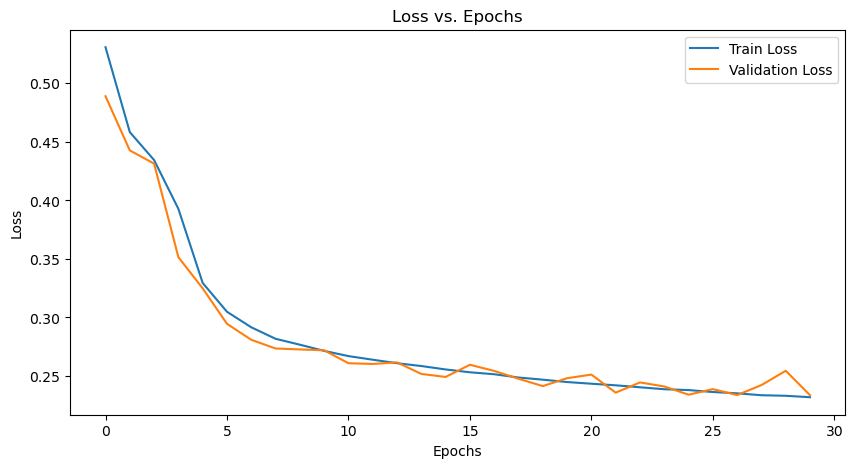

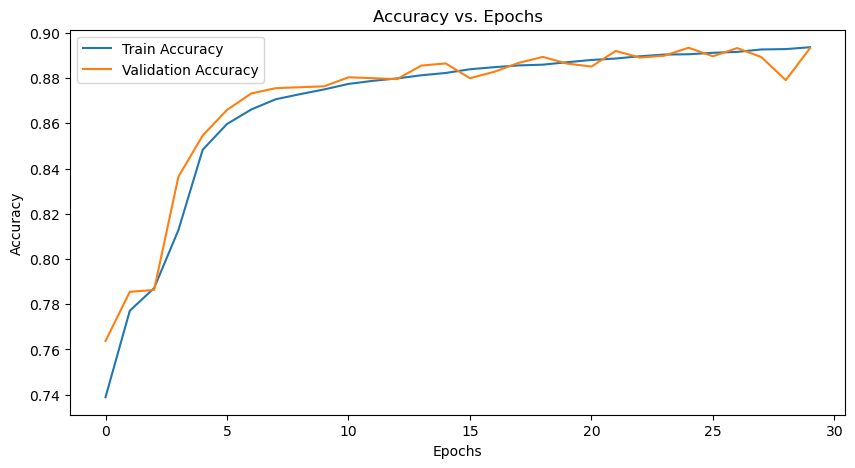

7742/7742 [==============================] - 19s 2ms/step
Accuracy: 0.8934487769435698
Precision: 0.9123532302061977
Recall: 0.87029180505386
F1 Score: 0.8908262989631457
AUC Score: 0.89


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Chargement du dataset
df = pd.read_csv('../dataset_smote.csv')

# Séparation des features (X) et de la variable cible (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Division des données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Division de l'ensemble d'entraînement en ensembles d'entraînement et de validation (20% parmi 80% pour la validation)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalisation des données (par exemple, Min-Max scaling)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Remodelage des données pour une entrée CNN
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_validation = X_validation.reshape(-1, X_validation.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# Créez le modèle CNN
model = models.Sequential()

# Couche de convolution 1
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(2))

# Couche de convolution 2
model.add(layers.Conv1D(64, 2, activation='relu'))
model.add(layers.GlobalMaxPooling1D())

# Couche fully connected (densément connectée)
model.add(layers.Dense(128, activation='relu'))

# Couche de sortie
model.add(layers.Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Utilisation de Early Stopping pour éviter le surapprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînez le modèle
history = model.fit(X_train, y_train, epochs=30, batch_size=64,
                    validation_data=(X_validation, y_validation),
                    callbacks=[early_stopping])

# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()


# Visualisation de l'historique d'entraînement
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Utilisez 'accuracy' ou 'acc' selon votre historique
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Utilisez 'val_accuracy' ou 'val_acc'
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.show()

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC Score: {auc:.2f}")


In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Calcul des métriques
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)


cnn_results = pd.DataFrame([['convolutional neurual network', acc,prec,rec, f1, auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Sauvegardez le DataFrame dans un fichier CSV
cnn_results.to_csv('../evaluations/cnn_results.csv', index=False)

cnn_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,convolutional neurual network,0.893449,0.912353,0.870292,0.890826,0.893426


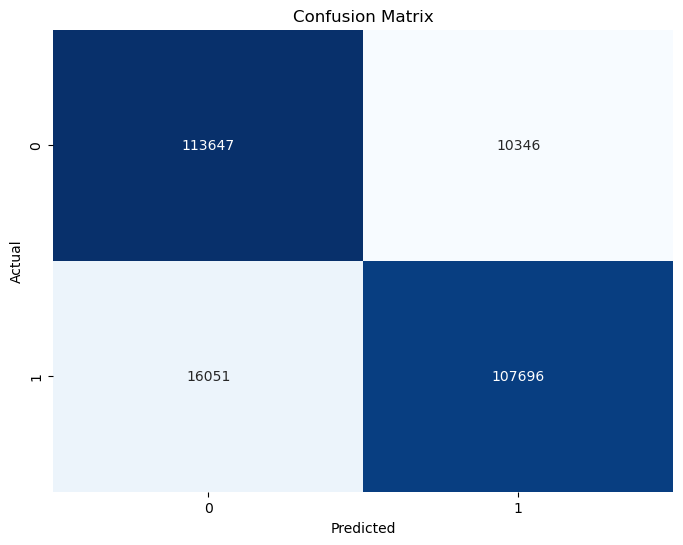

In [4]:

# Affichage de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

